In [1]:
from recombee_api_client.api_client import *
from recombee_api_client.api_requests import *
import json
import csv
import time
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [2]:
client = RecombeeClient('flaviu-dev', 'yO02H30kHYTnkNFgXNslwpANvptPXWPp8oUo6XDKeQGAaEMQk7utEdMnx84wCnyJ', region=Region.EU_WEST)
num_users = 33  # From people.csv
num_items = 837  # Assuming 837 laptops from earlier import

In [3]:
client.send(ResetDatabase())

'ok'

In [5]:
client.send(AddItemProperty('Brand', 'string'))
client.send(AddItemProperty('Model_Name', 'string'))
client.send(AddItemProperty('Processor', 'string'))
client.send(AddItemProperty('Operating_System', 'string'))
client.send(AddItemProperty('Storage', 'string'))
client.send(AddItemProperty('RAM', 'string'))
client.send(AddItemProperty('Screen_Size', 'string'))
client.send(AddItemProperty('Touch_Screen', 'boolean'))
client.send(AddItemProperty('Price', 'double'))

'ok'

In [6]:
requests = []
with open('Laptops.csv', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    for i, row in enumerate(reader):
        values = {
            'Brand': row['Brand'],
            'Model_Name': row['Model Name'],
            'Processor': row['Processor'],
            'Operating_System': row['Operating System'],
            'Storage': row['Storage'],
            'RAM': row['RAM'],
            'Screen_Size': row['Screen Size'],
            'Touch_Screen': True if row['Touch_Screen'] == 'Yes' else False,
            'Price': float(row['Price'].replace('₹', '').replace(',', '')),
        }
        r = SetItemValues(i, values, cascade_create=True)
        requests.append(r)

res = client.send(Batch(requests))
print(res)

[{'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200, 'json': 'ok'}, {'code': 200,

In [ ]:
client.send(AddUserProperty('Sales_person', 'string'))
client.send(AddUserProperty('SP_ID', 'string'))
client.send(AddUserProperty('Team', 'string'))
client.send(AddUserProperty('Location', 'string'))

In [ ]:
requests = []
with open('people.csv', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    for i, row in enumerate(reader):
        values = {
            'Sales_person': row['\ufeffSales person'],
            'SP_ID': row['SP ID'], 
            'Team': row['Team'],
            'Location': row['Location']
        }
        r = SetUserValues(i, values, cascade_create=True)
        requests.append(r)

res = client.send(Batch(requests))
print(res)

In [ ]:
# Generate 100 random view interactions
requests = []

# Generate views over the last 30 days
end_date = datetime.now()
start_date = end_date - timedelta(days=30)

for _ in range(100):
    user_id = random.randint(0, num_users-1)
    item_id = random.randint(0, num_items-1)
    timestamp = start_date + timedelta(
        seconds=random.randint(0, int((end_date - start_date).total_seconds()))
    )
    
    view = AddDetailView(
        user_id=str(user_id),
        item_id=str(item_id),
        # timestamp=timestamp,
        cascade_create=True
    )
    requests.append(view)

res = client.send(Batch(requests))
print(res)


In [ ]:
# Generate 100 random cart additions
requests = []

for _ in range(100):
    user_id = random.randint(0, num_users-1)
    item_id = random.randint(0, num_items-1)
    timestamp = start_date + timedelta(
        seconds=random.randint(0, int((end_date - start_date).total_seconds()))
    )
    
    cart_addition = AddCartAddition(
        user_id=str(user_id),
        item_id=str(item_id),
        # timestamp=timestamp,
        cascade_create=True
    )
    requests.append(cart_addition)

res = client.send(Batch(requests))
print(res)

In [3]:
# Pick a random user
random_user_id = random.randint(0, num_users-1)

# Create a recommendation request for the random user
recommendation_request = RecommendItemsToUser(
    user_id=str(random_user_id),
    count=10,
    cascade_create=True,
    scenario='colaborativ'
)

# Send the recommendation request
recommendation_result = client.send(recommendation_request)

# Print the recommended items
print(f"Recommended items for user {random_user_id}: {recommendation_result['recomms']}")


Recommended items for user 28: [{'id': '681'}, {'id': '805'}, {'id': '779'}, {'id': '754'}, {'id': '735'}, {'id': '717'}, {'id': '693'}, {'id': '649'}, {'id': '612'}, {'id': '583'}]


Total number of users: 3


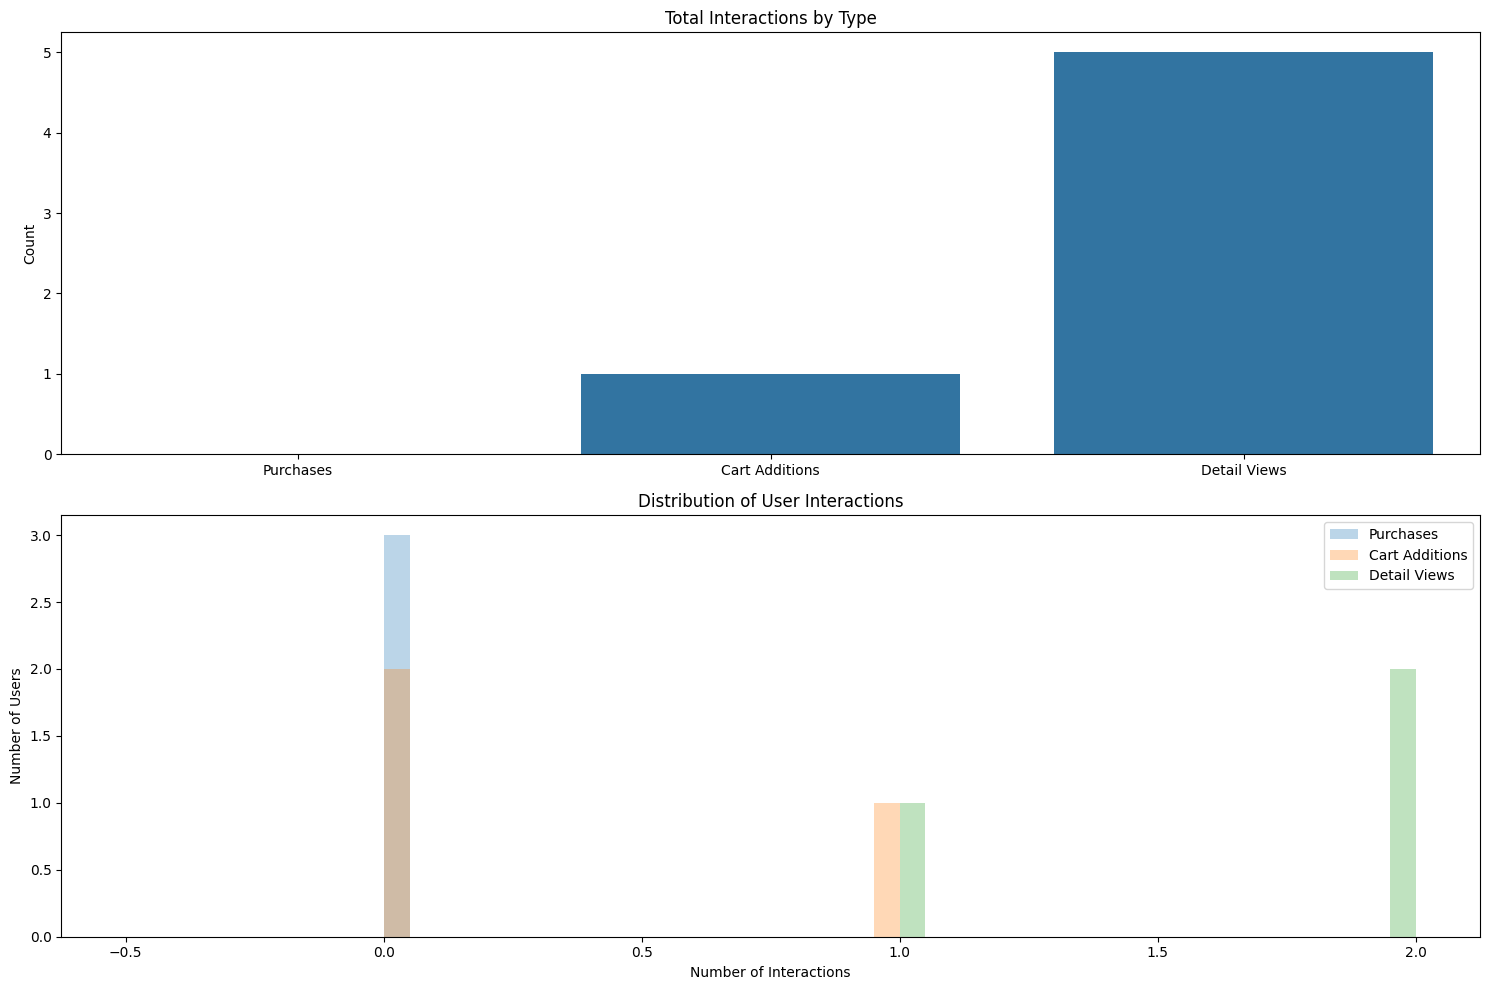


Summary Statistics:
Average purchases per user: 0.00
Average cart additions per user: 0.33
Average detail views per user: 1.67


In [7]:
# Get all users
all_users = client.send(ListUsers())
print(f"Total number of users: {len(all_users)}")

# Get interactions per user
user_interactions = defaultdict(lambda: {'purchases': 0, 'cart_additions': 0, 'detail_views': 0})

# Create batch requests for purchases, cart additions and detail views
batch_requests = []
for user in all_users:
    batch_requests.append(ListUserPurchases(user))
    batch_requests.append(ListUserCartAdditions(user))
    batch_requests.append(ListUserDetailViews(user))

# Send batch request
batch_results = client.send(Batch(batch_requests))

# Process batch results
for i in range(0, len(batch_results), 3):
    user = all_users[i//3]
    user_purchases = batch_results[i]['json']
    user_cart_adds = batch_results[i+1]['json']
    user_detail_views = batch_results[i+2]['json']
    user_interactions[user]['purchases'] = len(user_purchases)
    user_interactions[user]['cart_additions'] = len(user_cart_adds)
    user_interactions[user]['detail_views'] = len(user_detail_views)

# Convert to lists for plotting
users = list(user_interactions.keys())
purchases_count = [user_interactions[u]['purchases'] for u in users]
cart_adds_count = [user_interactions[u]['cart_additions'] for u in users]
detail_views_count = [user_interactions[u]['detail_views'] for u in users]

# Create visualization
plt.figure(figsize=(15, 10))

# Plot 1: Bar chart of total interactions per type
plt.subplot(2, 1, 1)
interaction_types = ['Purchases', 'Cart Additions', 'Detail Views']
total_counts = [sum(purchases_count), sum(cart_adds_count), sum(detail_views_count)]
sns.barplot(x=interaction_types, y=total_counts)
plt.title('Total Interactions by Type')
plt.ylabel('Count')

# Plot 2: Distribution of interactions per user
plt.subplot(2, 1, 2)
plt.hist(purchases_count, alpha=0.3, label='Purchases', bins=20)
plt.hist(cart_adds_count, alpha=0.3, label='Cart Additions', bins=20)
plt.hist(detail_views_count, alpha=0.3, label='Detail Views', bins=20)
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.title('Distribution of User Interactions')
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(f"Average purchases per user: {sum(purchases_count)/len(users):.2f}")
print(f"Average cart additions per user: {sum(cart_adds_count)/len(users):.2f}")
print(f"Average detail views per user: {sum(detail_views_count)/len(users):.2f}")
